In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('../DATA/wholesome_customers_data.csv')

In [3]:
df.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Channel           440 non-null    int64
 1   Region            440 non-null    int64
 2   Fresh             440 non-null    int64
 3   Milk              440 non-null    int64
 4   Grocery           440 non-null    int64
 5   Frozen            440 non-null    int64
 6   Detergents_Paper  440 non-null    int64
 7   Delicassen        440 non-null    int64
dtypes: int64(8)
memory usage: 27.6 KB


<Axes: xlabel='Milk', ylabel='Grocery'>

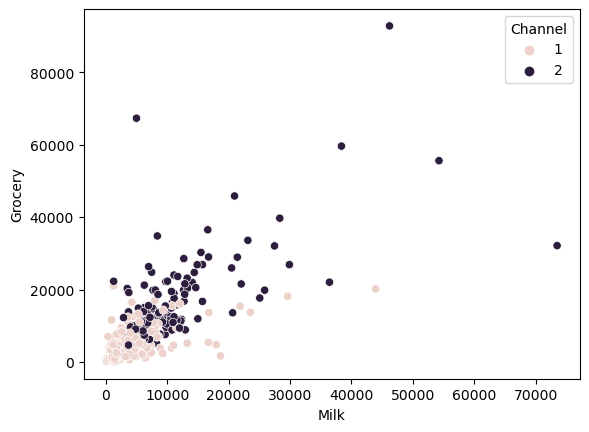

In [5]:
sns.scatterplot(data=df, x='Milk', y='Grocery', hue='Channel')

<Axes: xlabel='Milk', ylabel='Count'>

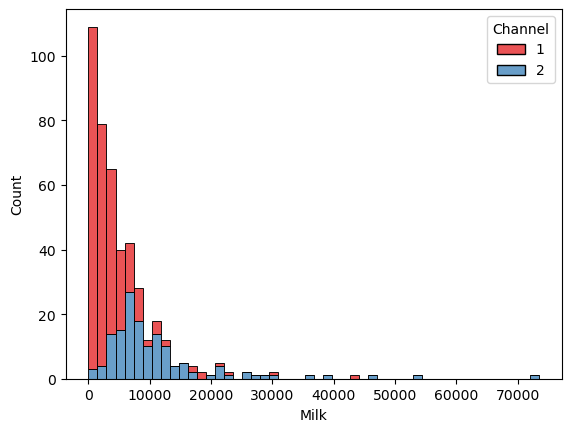

In [7]:
sns.histplot(data=df, x='Milk', hue='Channel', palette='Set1',
            multiple='stack')

# multiple = stack ==> stacks the histograms on top of each other

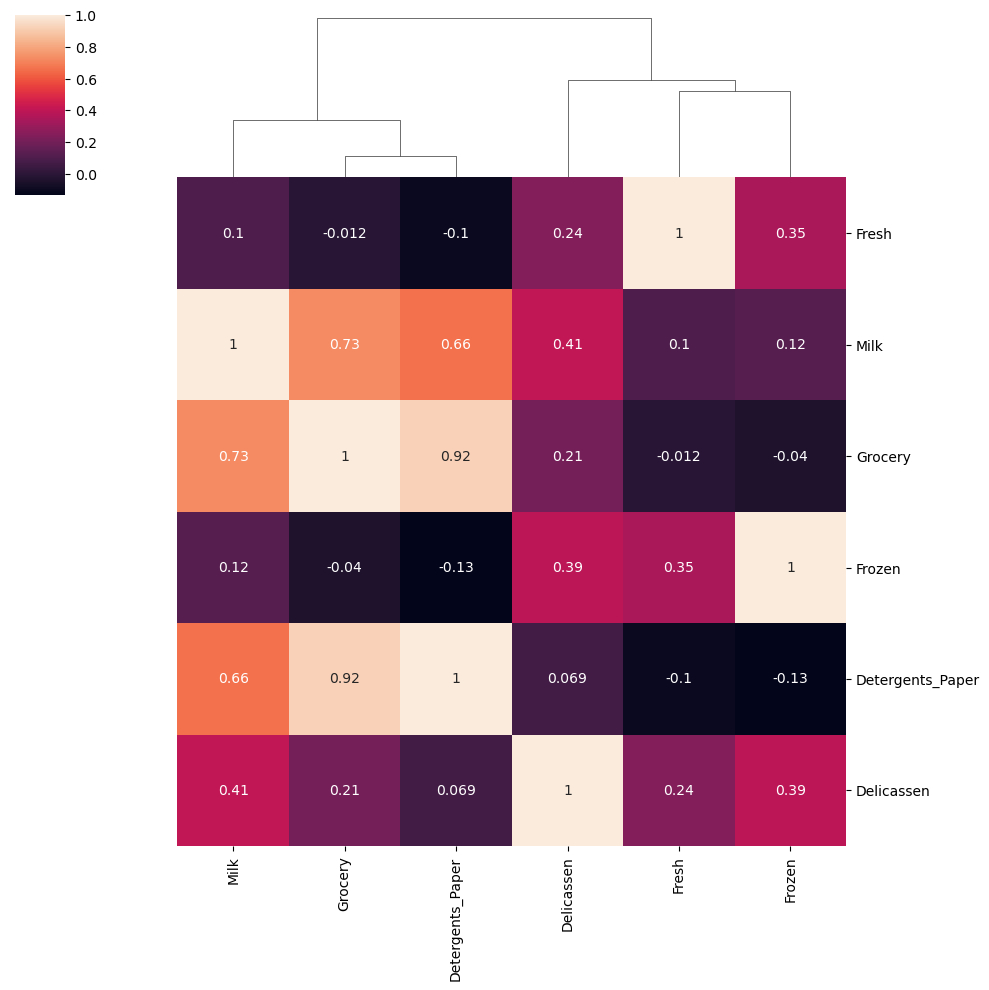

In [9]:
sns.clustermap(df.drop(['Region', 'Channel'], axis=1).corr(), annot=True,
              row_cluster=False)

#row_cluster = False or col_cluster=False ==> removes duplication

C:\Users\admin\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


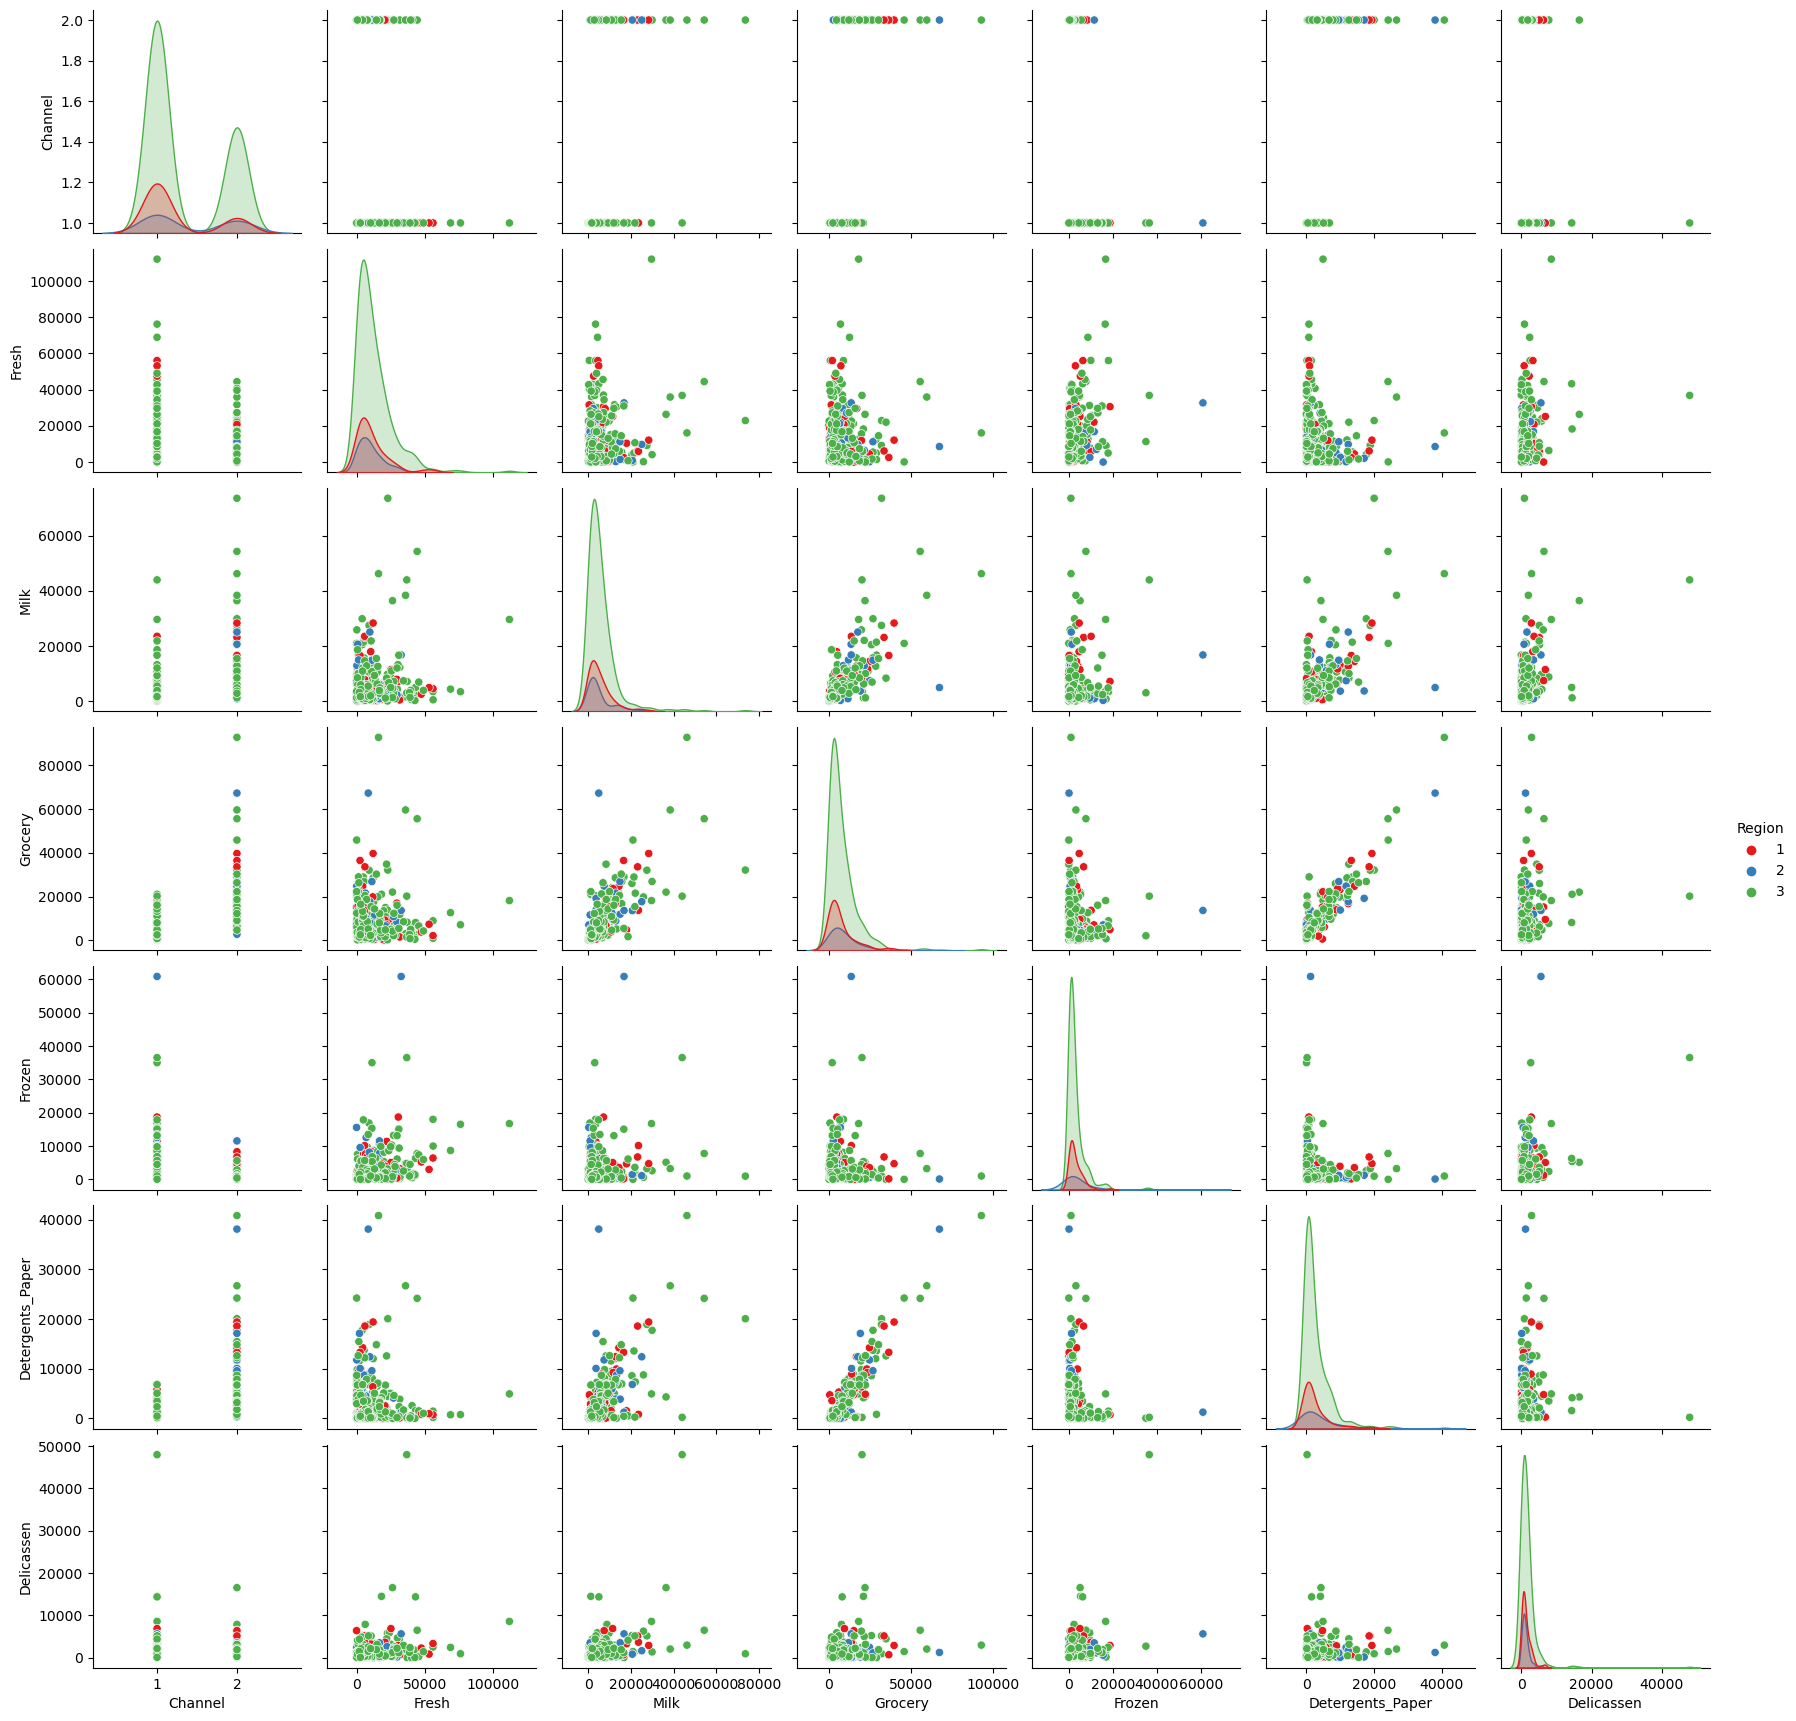

In [10]:
sns.pairplot(data=df, hue='Region', palette='Set1')

In [11]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_X = scaler.fit_transform(df)

In [12]:
scaled_X

array([[ 1.44865163,  0.59066829,  0.05293319, ..., -0.58936716,
        -0.04356873, -0.06633906],
       [ 1.44865163,  0.59066829, -0.39130197, ..., -0.27013618,
         0.08640684,  0.08915105],
       [ 1.44865163,  0.59066829, -0.44702926, ..., -0.13753572,
         0.13323164,  2.24329255],
       ...,
       [ 1.44865163,  0.59066829,  0.20032554, ..., -0.54337975,
         2.51121768,  0.12145607],
       [-0.69029709,  0.59066829, -0.13538389, ..., -0.41944059,
        -0.56977032,  0.21304614],
       [-0.69029709,  0.59066829, -0.72930698, ..., -0.62009417,
        -0.50488752, -0.52286938]])

In [13]:
from sklearn.cluster import DBSCAN

In [14]:
outlier_percent=[]
for eps in np.linspace(0.001,3,50):
    dbscan = DBSCAN(eps=eps, min_samples = 2*scaled_X.shape[1])
    dbscan.fit(scaled_X)
    
    perc_outliers=100*np.sum(dbscan.labels_ == -1)/len(dbscan.labels_)
    outlier_percent.append(perc_outliers)

<Axes: >

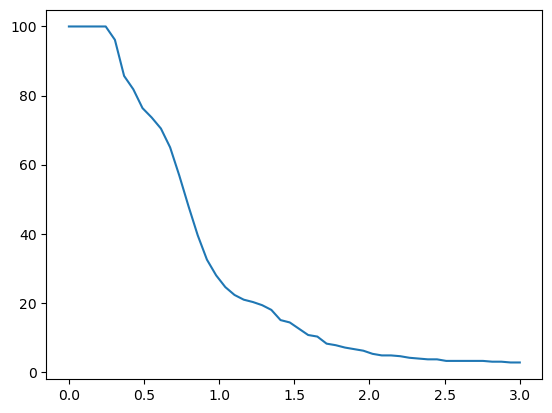

In [15]:
sns.lineplot(x=np.linspace(0.001,3,50), y=outlier_percent)

In [17]:
dbscan = DBSCAN(eps=2, min_samples=scaled_X.shape[1])

In [18]:
dbscan.fit(scaled_X)

DBSCAN(eps=2, min_samples=8)

In [19]:
dbscan.labels_

array([ 0,  0,  0,  1,  0,  0,  0,  0,  1,  0,  0,  0,  0,  0,  0,  1,  0,
        1,  0,  1,  0,  1,  1, -1,  0,  0,  1,  1,  0,  1,  1,  1,  1,  1,
        1,  0,  1,  0,  0,  1,  1,  1,  0,  0,  0,  0,  0, -1,  0,  0,  1,
        1,  0,  0,  1,  1,  0,  0,  1,  1,  0, -1,  0,  0,  1, -1,  1,  0,
        1,  1,  1, -1,  1,  0,  0,  1,  1,  0,  1,  1,  1,  0,  0,  1,  0,
       -1, -1, -1,  1,  1,  1,  1, -1, -1,  0,  1,  0,  1,  1,  1,  0,  0,
        0,  1,  1,  1,  0,  0,  0,  0,  1,  0,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  0,  1, -1,  1,  0,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  0,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  0,  0,  1,  0,  0,  0,  1,  1,  0,  0,  0,  0,  1,  1,  1,
        0,  0,  1,  0,  1,  0,  1,  1,  1,  1,  1, -1,  1, -1,  1,  1,  1,
        1,  0,  0,  1,  1,  1,  0,  1,  1,  1,  0,  1,  1,  0,  0,  1,  1,
        1,  0,  1,  0,  1,  0,  1, -1,  1,  1,  0,  1,  0,  1,  0,  1,  1,
        1,  1,  0,  1,  1

<Axes: xlabel='Grocery', ylabel='Milk'>

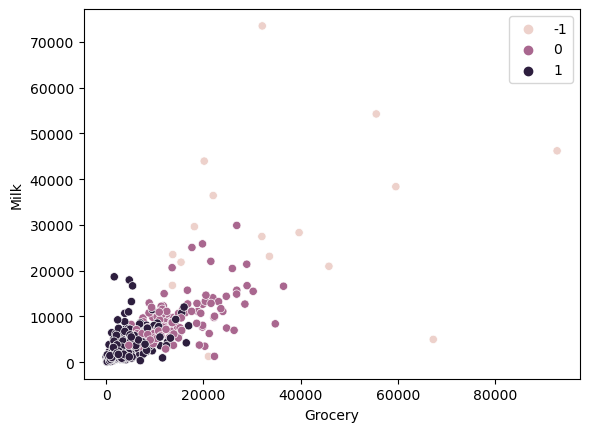

In [20]:
sns.scatterplot(data=df, x='Grocery', y='Milk', hue=dbscan.labels_)

<Axes: xlabel='Detergents_Paper', ylabel='Milk'>

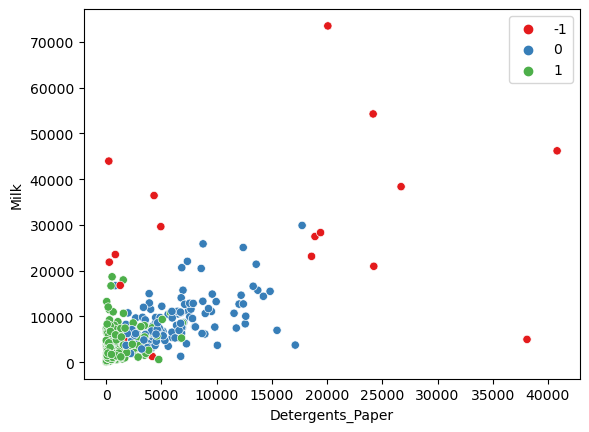

In [21]:
sns.scatterplot(data=df, x='Detergents_Paper', y='Milk',
               hue=dbscan.labels_, palette='Set1')

In [22]:
df['Labels'] = dbscan.labels_

In [23]:
df.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,Labels
0,2,3,12669,9656,7561,214,2674,1338,0
1,2,3,7057,9810,9568,1762,3293,1776,0
2,2,3,6353,8808,7684,2405,3516,7844,0
3,1,3,13265,1196,4221,6404,507,1788,1
4,2,3,22615,5410,7198,3915,1777,5185,0


In [25]:
cats=df.drop(['Channel', 'Region'], axis=1)
cat_means = cats.groupby('Labels').mean()

<Axes: ylabel='Labels'>

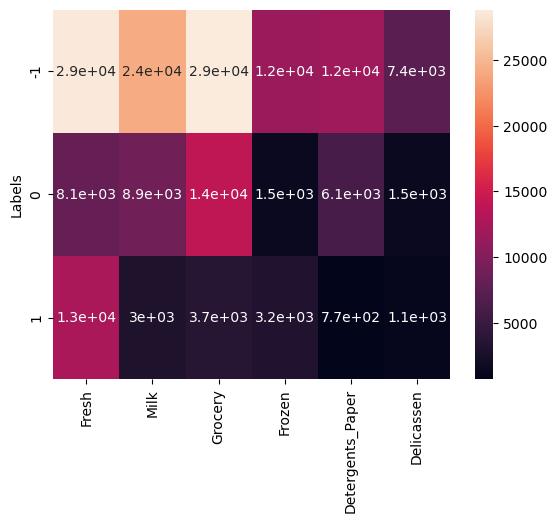

In [26]:
sns.heatmap(cat_means, annot=True)